___
# Simple Perceptron
___

In [11]:
import pyvie as pv
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

movie = pv.Movie('perceptron',framerate=2,file_type='.png',movie_type = '.avi')
plt.figure(figsize = (10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

#### Let's make some fake data and look at it!

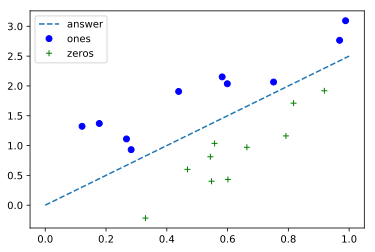

In [12]:
# define the line (but don't tell anyone!)
num_ones = 10
num_zeros = 10
m = 2.5
b = 0
eps = 0.1 # use this to get a bit more separation
x1_ones = np.random.random(num_ones)
x1_zeros = np.random.random(num_zeros)
x_line = np.linspace(0,1)

x2_ones = m*x1_ones + b + np.random.random(x1_ones.size) + eps
x2_zeros = m*x1_zeros + b - np.random.random(x1_zeros.size) - eps
y_line = m*x_line + b 
plt.plot(x_line,y_line,'--',label='answer')
plt.plot(x1_ones,x2_ones,'bo', label='ones')
plt.plot(x1_zeros,x2_zeros,'g+', label='zeros')
plt.legend()

### Use our fake data to train the perceptron.

0.0
change weights
-2.0394236977665856 -2.1848643392482443
-2.0394236977665856 -1.9089364532245228
-0.24913405103147315 -0.6031531654215168 0.0
0.0
change weights
-1.3775892580062168 -1.2674835713312675
-0.2156002445464711 -0.5589526056698907 0.0
0.0
change weights
-0.6787211405621663 -0.5113191618201152
-0.18236606694563046 -0.4162925326891256 0.0
0.0
change weights
-0.8740845716690657 -0.9446810050512802
-0.8740845716690657 -0.9032180336196014
-0.8740845716690657 -1.2783908446976016
-0.8740845716690657 -0.7866446318263034
-0.1773950155572866 -0.3715934675416642 0.0
0.0
change weights
-0.5131007976411033 -0.5704344409174357
-0.5131007976411033 -0.39678821278834814
-0.29783663447757597 -0.27265317368908043 0.0
0.0
change weights
-0.7869076630832776 -0.679151329988047
-0.1064775544339081 -0.2900987687111602 0.0
0.0
change weights
-0.4164420537538795 -0.5141913579549456
-0.4164420537538795 -0.4317679051352269
-0.4164420537538795 -0.679168680181726
-0.4164420537538795 -0.5885573235817503


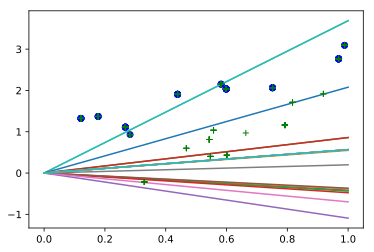

In [13]:
# grid for plotting current line
x_check = np.linspace(0,1)


# Use a grid search to find the best weights.

pert = 0.2 # amount to perturb weights

# start with random weights
w_1 = 2*np.random.random() - 1
w_2 = 2*np.random.random() - 1

# through through the known data
x_1_plot = np.array([])
x_2_plot = np.array([])

# "ones"
for x1_count, x1_val in enumerate(x1_ones):
    x2_val = x2_ones[x1_count]
    x_1_plot = np.append(x_1_plot,x1_val)
    x_2_plot = np.append(x_2_plot,x2_val)
    sum_current = w_1*x1_val + w_2*x2_val
    y_current = np.heaviside(sum_current, 0) # output
    print(y_current)
    if sum_current < 0.0: # sum is too low
        print('change weights')
        bad = True
        while(bad):
            w_1_temp  = w_1 + pert*(2*np.random.random() - 1)
            w_2_temp = w_2 + pert*(2*np.random.random() - 1)
            sum_temp = w_1_temp*x1_val + w_2_temp*x2_val # test new value
            print(sum_current,sum_temp)
            if sum_temp >= sum_current:
                bad = False
                w_1 = w_1_temp
                w_2 = w_2_temp
    print(w_1,w_2,y_current)
#     plt.plot(x1_ones,x2_ones,'bo', label='ones')
#     plt.plot(x1_zeros,x2_zeros,'g+', label='zeros')
    plt.plot(x_1_plot, x_2_plot, 'bo')
    y_check  = -w_1*x_check/w_2
    plt.plot(x_check, y_check)
    movie.gather()

# "zeros"
print('___')
for x1_count, x1_val in enumerate(x1_zeros):
    x2_val = x2_zeros[x1_count]
    x_1_plot = np.append(x_1_plot,x1_val)
    x_2_plot = np.append(x_2_plot,x2_val)
    sum_current = w_1*x1_val + w_2*x2_val
    y_current = np.heaviside(sum_current,0) # output
    print(y_current)
    if sum_current >= 0:
        print('change weights')
        bad = True
        while(bad):
            w_1_temp = w_1 + pert*(2*np.random.random() - 1)
            w_2_temp = w_2 + pert*(2*np.random.random() - 1)
            sum_temp = w_1_temp*x1_val + w_2_temp*x2_val # test new value
            print(sum_current,sum_temp)
            if sum_temp <= sum_current:
                bad = False
                w_1 = w_1_temp
                w_2 = w_2_temp
    print(w_1,w_2,y_current)
#     plt.plot(x1_ones,x2_ones,'bo', label='ones')
#     plt.plot(x1_zeros,x2_zeros,'g+', label='zeros')
    plt.plot(x_1_plot, x_2_plot, 'g+')
    y_check  = -w_1*x_check/w_2
    plt.plot(x_check, y_check)
    movie.gather()
    
movie.finalize()

0.09830197786521896 -0.17373455515253566


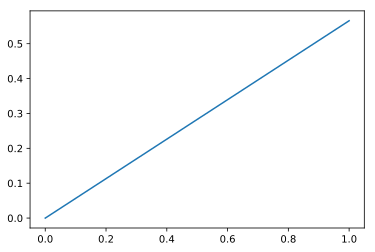

In [14]:
print(w_1,w_2)
x_check = np.linspace(0,1)
y_check  = -w_1*x_check/w_2

plt.plot(x_check,y_check)

In [15]:
from IPython.display import HTML
HTML("""
<video width="320" height="240" controls>
  <source src="./perceptron.webm" type="video/mp4">
</video>
""")